## Problem 1
### question a)

We have the following : 
$$ ∆  = C_{imp}(T_{old})−C_{imp}(T_{new}) $$
$$ C_{imp}(T_{old}) = \sum_{m = 1}^M N_m \times Q_m(T_{old}) $$
$$ C_{imp}(T_{new}) = \sum_{m = 1}^{M+1} \tilde{N_m} \times \tilde{Q_m(T_{new})} $$

$Q_m$ is the value of the impurity function at bucket $m$. When we consider a split at the final bucket M, we split the bucket M in two new buckets M and M+1. Note that we let the M-1 other buckets intact, so the value of the impurity function and the number of observations in the M-1 other buckets stay the same.
That is why we have that : \
For $1 \leq m \leq M-1 : N_m \times Q_m(T_{old}) = \tilde{N_m} \times \tilde{Q_m(T_{new})}$ 
\
Then, we have the following equality : 
$$ ∆  = C_{imp}(T_{old})−C_{imp}(T_{new}) = \sum_{m = 1}^M N_m \times Q_m(T_{old}) - \sum_{m = 1}^{M+1} \tilde{N_m} \times \tilde{Q_m(T_{new})} = N_M \times Q_M(T_{old}) - \tilde{N_M} \times \tilde{Q_M(T_{new})} - \tilde{ N_{M+1} } \times \tilde{Q_{M+1}}(T_{new})$$ 
\
The following formula for ∆  can be computed locally at the bucket M,  in other words it only depends on the data points that fall in region $R_M$ in the original tree $T_{old}$ : 
$$ ∆ = N_M \times Q_M(T_{old}) - \tilde{N_M} \times \tilde{Q_M(T_{new})} - \tilde{ N_{M+1} } \times \tilde{Q_{M+1}}(T_{new})$$ 

### question b)

When we consider a new split, the new split between the two regions $R_M$ and $R_{M+1}$ is choosen to minimize : 
$$ \sum_{x_i \in R_M} (x_i - \hat{x_M}) +  \sum_{x_i \in R_{M+1}} (x_i - \hat{x_{M+1}})$$
with $\hat{x_k} = \frac{ \sum_{x_i \in R_k} x_i}{N_k}$, the  mean of the values of $x_i$ in bucket $k$.  

Define $RSS_{R_k}(x) = \sum_{x_i \in R_k} (x_i - x)^2 $ for $1\leq k \leq M+1$.
$\hat{x_k}$ is the minimizer of the function $RSS_{R_k}(x)$
\
Then, the new split between the two regions $R_M$ and $R_{M+1}$ is choosen to minimize : $RSS_{R_M}(\hat{x_{M}}) + RSS_{R_{M+1}}(\hat{x_{M+1}})$


\
Then, we have that : 
$$\tilde{N_M} \times \tilde{Q_M(T_{new})} = \min RSS_{R_M}(\hat{x_M}) $$
$$\tilde{N_{M+1}} \times \tilde{Q_{M+1}(T_{new})} = \min RSS_{R_{M+1}}(\hat{x_{M+1}}) $$

Then, 
 $$ \tilde{N_M} \times \tilde{Q_M(T_{new})} + \tilde{ N_{M+1} } \times \tilde{Q_{M+1}}(T_{new}) = \min RSS_{R_{M}}(x) +  \min RSS_{R_{M+1}}(x)  =  RSS_{R_{M}}(\hat{x_M}) +  RSS_{R_{M+1}}(\hat{x_{M+1}}) $$
And : 
$$N_M \times Q_M(T_{old}) = RSS_{R_{M}}(y_M) +  RSS_{R_{M+1}}(y_M) \geq \min RSS_{R_{M}}(x) +  \min RSS_{R_{M+1}}(x)  = \tilde{N_M} \times \tilde{Q_M(T_{new})} + \tilde{ N_{M+1} } \times \tilde{Q_{M+1}}(T_{new}) $$ 
\
with y_M is the mean of the values in the old bucket M.
\
\
Finally,$$ ∆ = N_M \times Q_M(T_{old}) - \tilde{N_M} \times \tilde{Q_M(T_{new})} - \tilde{ N_{M+1} } \times \tilde{Q_{M+1}}(T_{new}) > 0 $$
\
Splitting always reduces the total impurity cost

### question c)

We want to show that $C_{\alpha}(T_{new}) \leq C_{\alpha}(T_{old})$ if and only if $R^2_{new}−R^2_{old} \geq \alpha$. Note that : $|T_{new}| = M+1$ and $|T_{old}| = M$. \
\
$C_{\alpha}(T_{new}) \leq C_{\alpha}(T_{old}) \iff C_{imp}(T_{old}) - C_{imp}(T_{new}) + \alpha \times SST \times ( |T_{old}| - |T_{new}| \geq 0)
    \iff \Delta - \alpha \times SST \geq 0 $

Remark that, $\Delta =  N_M \times Q_M(T_{old}) - \tilde{N_M} \times \tilde{Q_M(T_{new})} - \tilde{ N_{M+1} } \times \tilde{Q_{M+1}}(T_{new}) = RSS(T_{old}) - RSS(T_{new}) $

Then,
$ C_{\alpha}(T_{new}) \leq C_{\alpha}(T_{old}) \iff RSS(T_{old}) - RSS(T_{new}) - \alpha \times SST \geq 0 
\iff \frac{RSS(T_{old}) - RSS(T_{new})}{SST} \geq \alpha 
\iff \frac{RSS(T_{old})}{STT} - \frac{RSS(T_{new})}{SST} \geq \alpha $

Note that, $R^2(T) = 1 -  \frac{RSS(T)}{STT}$
Finaly : $$ C_{\alpha}(T_{new}) \leq C_{\alpha}(T_{old}) \iff R^2(T_{new}) - R^2(T_{old}) \geq \alpha $$

## Problem 2

### question a)

This modeling approach seems reasonable because as values might be missing for certain reason, it might be
good idea to assign a special value ("missing") to underline this reason. Moreover,  this method is that all the records (even data with missing values) can be used for tree building and it is very simple to implement. But there is also a drawback to this method : it does not try to identify the original known values as missing values are considered as equally to "missing". But I think for this decision tree, it seems reasonable, because we have many data. 

### question b)

#### (i) Lets build a linear regression model. 

In [54]:
# we import the data and the package we need. 

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

yelp_train = pd.read_csv("yelp242_train.csv")
yelp_train.info()
yelp_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       6272 non-null   float64
 1   review_count                6272 non-null   int64  
 2   GoodForKids                 6272 non-null   object 
 3   Alcohol                     6272 non-null   object 
 4   BusinessAcceptsCreditCards  6272 non-null   object 
 5   WiFi                        6272 non-null   object 
 6   BikeParking                 6272 non-null   object 
 7   ByAppointmentOnly           6272 non-null   object 
 8   WheelechairAccessible       6272 non-null   object 
 9   OutdoorSeating              6272 non-null   object 
 10  RestaurantsReservations     6272 non-null   object 
 11  DogsAllowed                 6272 non-null   object 
 12  Caters                      6272 non-null   object 
dtypes: float64(1), int64(1), object(1

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.5,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE
1,3.5,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
2,4.5,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing)
3,4.0,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE
4,3.5,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)


In [55]:
# Below is the code for building a linear regression model

regression_model = smf.ols(formula='stars ~ review_count + C(GoodForKids, Treatment(reference="(Missing)")) + C(Alcohol, Treatment(reference="(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)")) + C(WiFi, Treatment(reference="(Missing)")) + C(BikeParking, Treatment(reference="(Missing)"))  + C(ByAppointmentOnly, Treatment(reference="(Missing)")) +  C(WheelechairAccessible, Treatment(reference="(Missing)")) + C(OutdoorSeating, Treatment(reference="(Missing)")) + C(RestaurantsReservations, Treatment(reference="(Missing)")) + C(DogsAllowed, Treatment(reference="(Missing)")) + C(Caters, Treatment(reference="(Missing)"))'  ,
                 data=yelp_train).fit()

print(regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     52.33
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          2.45e-235
Time:                        22:12:02   Log-Likelihood:                -7220.7
No. Observations:                6272   AIC:                         1.449e+04
Df Residuals:                    6246   BIC:                         1.467e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

#### question (ii)


In [56]:
# Below is the code for casting the response variable as Integer and casting the independent variables into binary variables. 

yelp_train['stars'] = yelp_train['stars'].astype('int64')
yelp_train_enc = pd.get_dummies(yelp_train, columns = ['Caters' , 'DogsAllowed' , 'RestaurantsReservations', 'OutdoorSeating', 'WheelechairAccessible' ,'ByAppointmentOnly' ,'BikeParking' , 'WiFi' , 'BusinessAcceptsCreditCards' , 'Alcohol' ,'GoodForKids'  ])
yelp_train_enc.head()

,stars,review_count,Caters_(Missing),Caters_FALSE,Caters_TRUE,DogsAllowed_(Missing),DogsAllowed_FALSE,DogsAllowed_TRUE,RestaurantsReservations_(Missing),RestaurantsReservations_FALSE,...,BusinessAcceptsCreditCards_(Missing),BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),GoodForKids_(Missing),GoodForKids_FALSE,GoodForKids_TRUE
0,4,153,0,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,3,19,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
2,4,3,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3,4,775,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,3,24,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [57]:
#below is the code for building the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

y_train = yelp_train_enc['stars']
X_train_enc = yelp_train_enc.drop(['stars'], axis=1)

dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.0005,
                             criterion = 'gini',
                             random_state = 88)

dtc = dtc.fit(X_train_enc, y_train)



Node count = 105


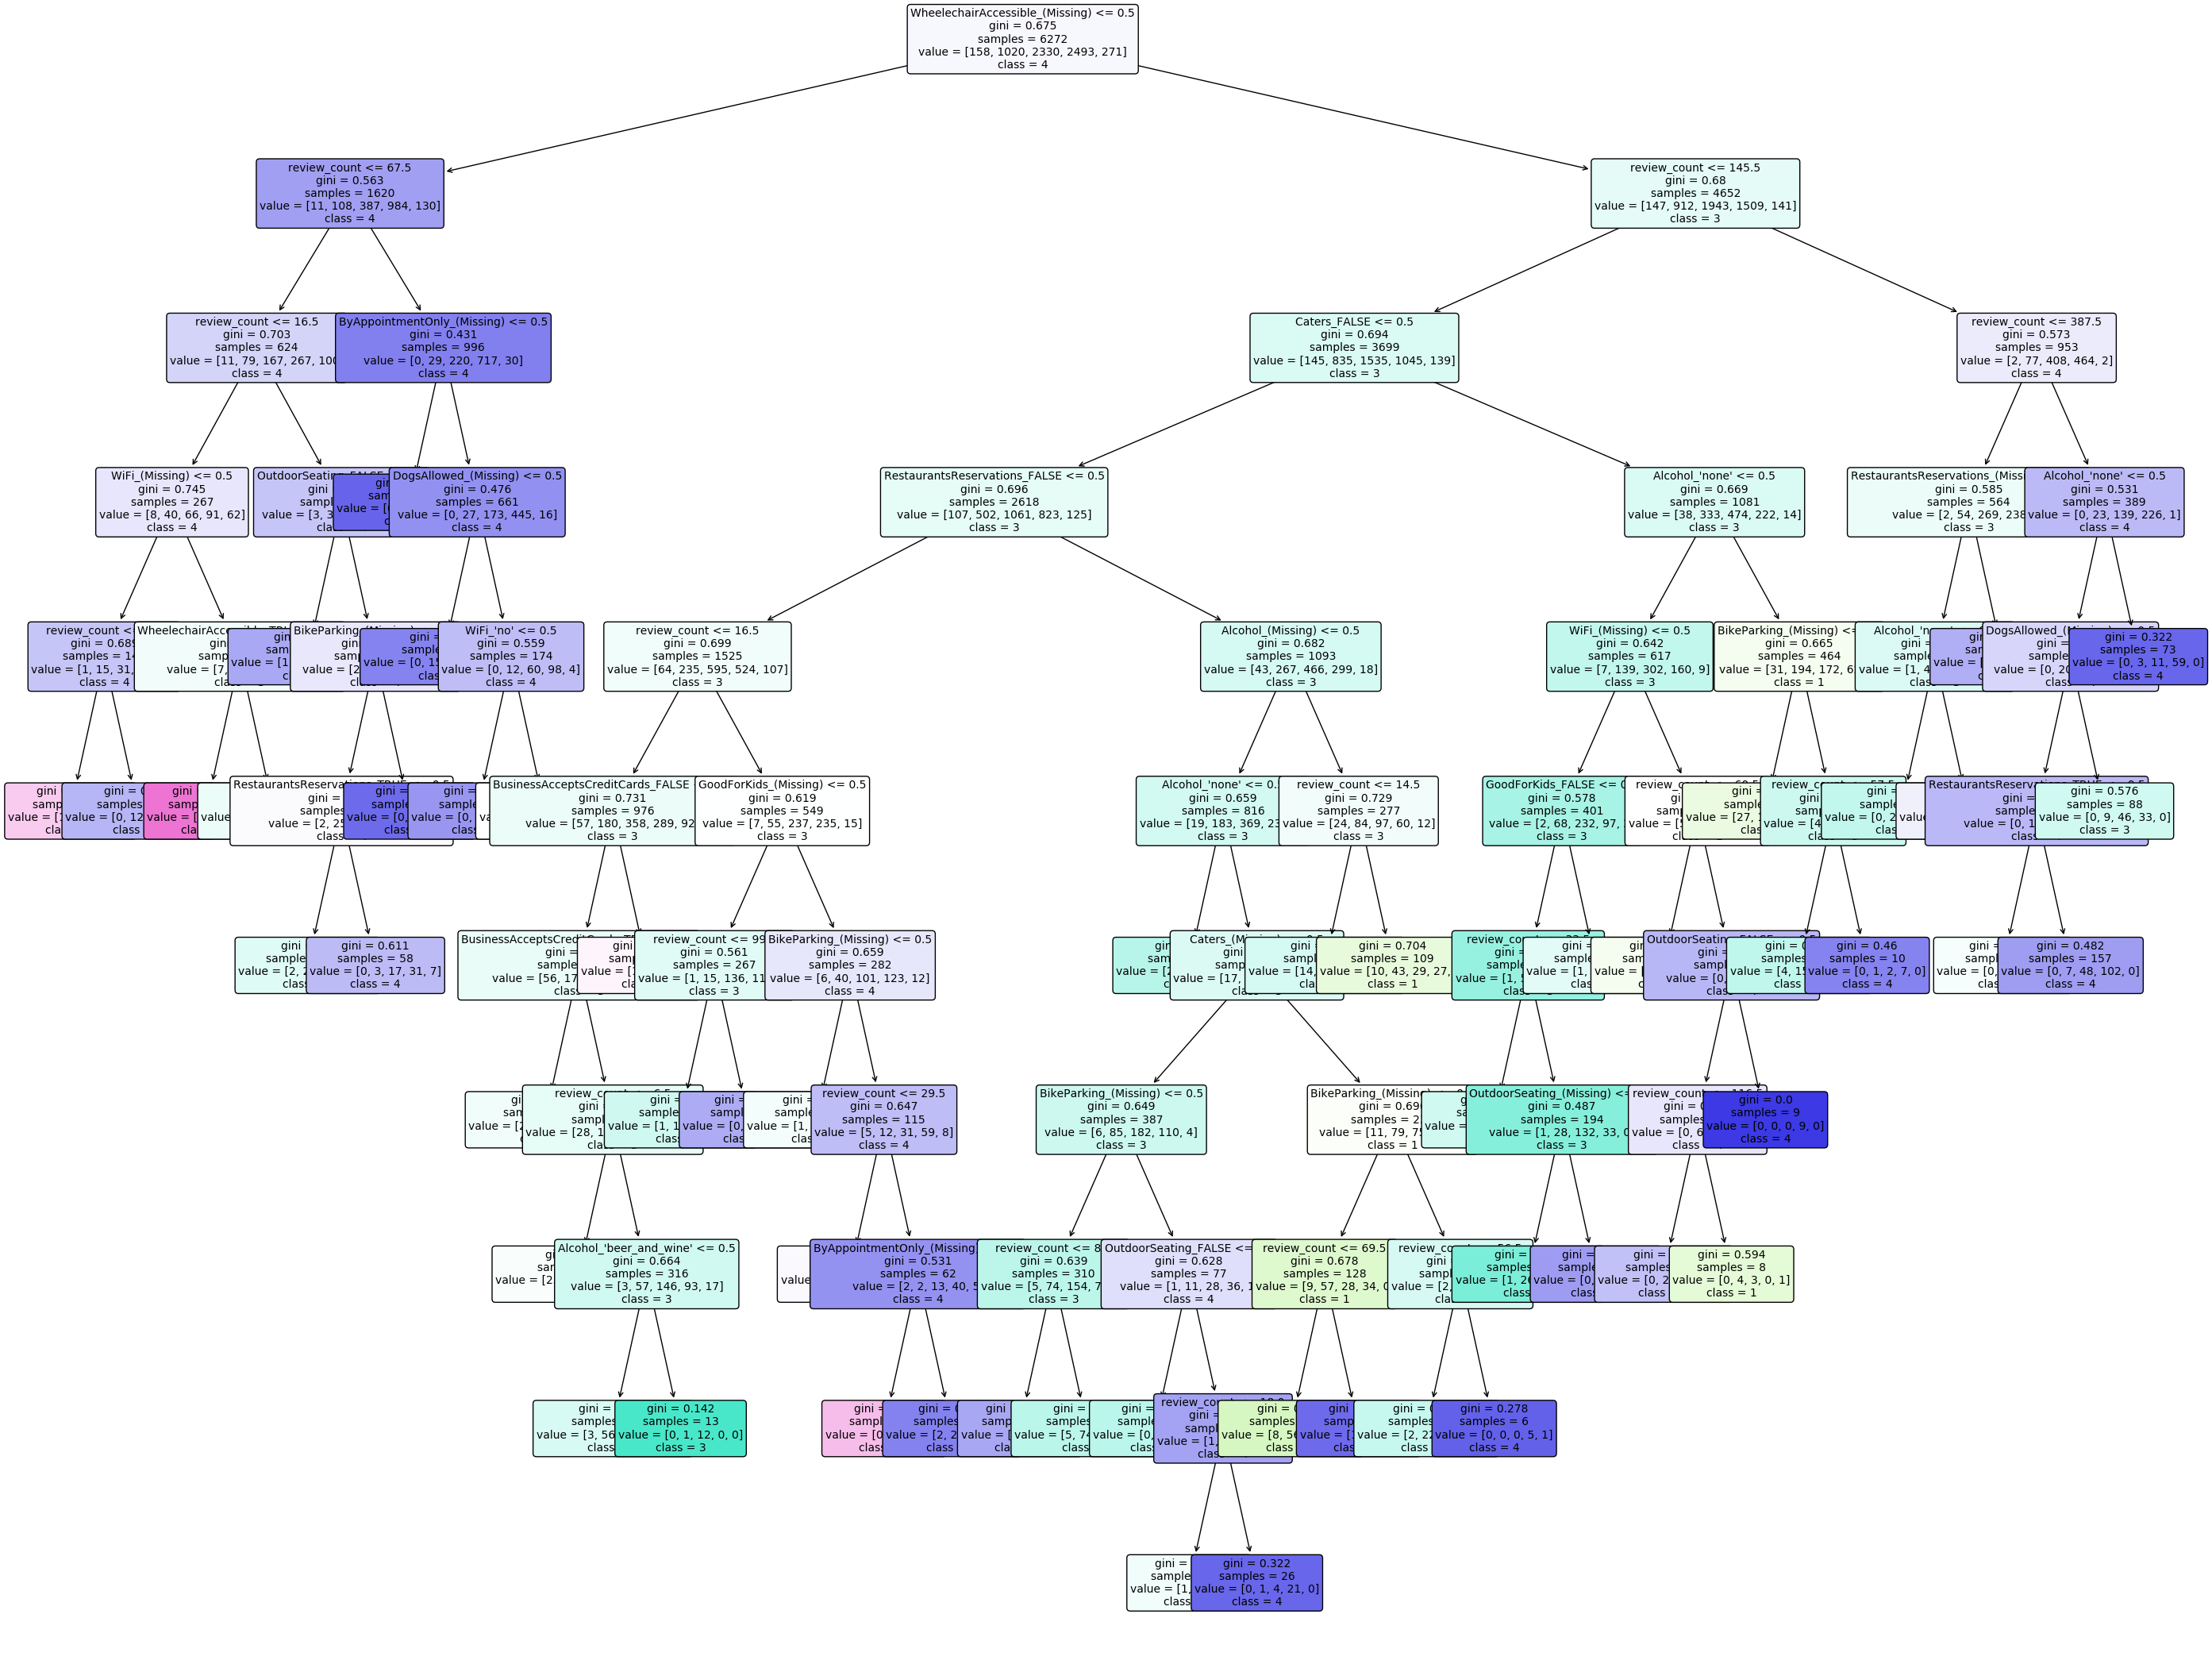

In [58]:
#below is the code for plotting the decision tree classifier and counting the number of nodes. 


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(25,20))
plot_tree(dtc, 
          feature_names=X_train_enc.columns, 
          class_names=['0','1','3', '4' , '5'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=10
         ) 
plt.show()

In [59]:
#exhaustive cross-validation. 
#Exhaustive search over specified parameter values for an estimator.

from sklearn.model_selection import GridSearchCV

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{ 1: 1 , 2: 1, 3: 1, 4: 1, 5: 1}],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
# default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train_enc, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'class_weight': [{1: 1, 2: 1, 3: 1, 4: 1, 5: 1}],
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
        

In [60]:
# below is the code that calcultates the validation accuracy in terms of ccp alpha. 

from sklearn.model_selection import GridSearchCV

acc = dtc_cv_acc.cv_results_['mean_test_score'] 
# what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)



,ccp alpha,Validation Accuracy
0,0,0.452000
1,0.0005,0.487241
2,0.001,0.478794
3,0.0015,0.474009
4,0.002,0.477197
5,0.0025,0.478154
6,0.003,0.476242
7,0.0035,0.474965
8,0.004,0.474965
9,0.0045,0.474965


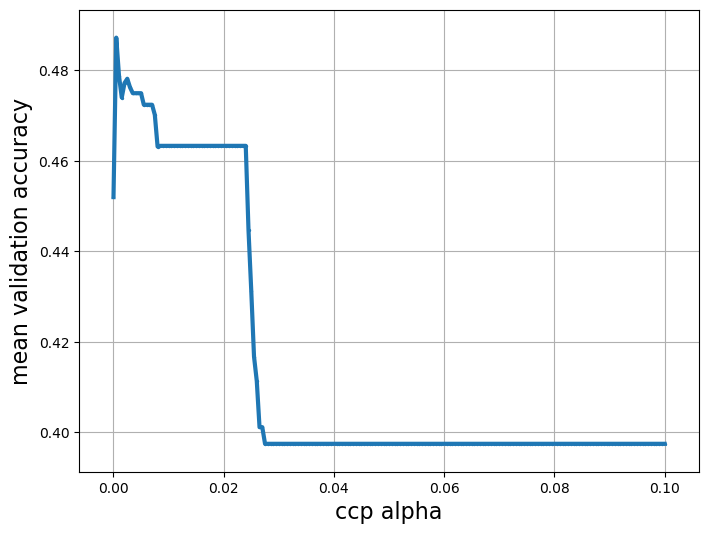

Grid best parameter ccp_alpha (max. accuracy):  0.0005
Grid best score (accuracy):  0.4872405753817085


In [61]:
# below is the code that plot the validation accuracy in terms of ccp alpha. 


plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

I built a regression tree model using CART algorithm with a complexity parameter first chosen to be equal to 0.001. Then, I did an exhausitive cross validation to validate the model and to chose the most adapted value of the complexity parameter. I selected the compelexity parameter value by plotting the mean validation accuracy in terms of the ccp alpha. To have the most adapted model (not overfitted and not underfitted) I chose the complexity parameter value which minimize the mean validation accuracy, that is cpp = 0.0005. I finally changed the ccp value to be equal to 0.0005 in the regression tree model. 

#### (iii) Lets set our linear regression model. 

In [62]:
# we upload the test data

yelp_test = pd.read_csv("yelp242_test.csv")
yelp_test.info()
yelp_test.head()


# Below is the code for casting the response variable as Integer and casting the independent variables into binary variables. 

yelp_test['stars'] = yelp_test['stars'].astype('int64')
yelp_test_enc = pd.get_dummies(yelp_test, columns = ['Caters' , 'DogsAllowed' , 'RestaurantsReservations', 'OutdoorSeating', 'WheelechairAccessible' ,'ByAppointmentOnly' ,'BikeParking' , 'WiFi' , 'BusinessAcceptsCreditCards' , 'Alcohol' ,'GoodForKids'  ])
yelp_test_enc.head()

y_test = yelp_test_enc['stars']
X_test = yelp_test_enc.drop(['stars'], axis=1)
X_test_reg = yelp_test.drop(['stars'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       2688 non-null   float64
 1   review_count                2688 non-null   int64  
 2   GoodForKids                 2688 non-null   object 
 3   Alcohol                     2688 non-null   object 
 4   BusinessAcceptsCreditCards  2688 non-null   object 
 5   WiFi                        2688 non-null   object 
 6   BikeParking                 2688 non-null   object 
 7   ByAppointmentOnly           2688 non-null   object 
 8   WheelechairAccessible       2688 non-null   object 
 9   OutdoorSeating              2688 non-null   object 
 10  RestaurantsReservations     2688 non-null   object 
 11  DogsAllowed                 2688 non-null   object 
 12  Caters                      2688 non-null   object 
dtypes: float64(1), int64(1), object(1

In [63]:
 from sklearn.metrics import r2_score 
# Below is the code to compute the OSR2 :
def OSR2(model, X_test, y_test, y_train):
 
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

print('The value of the OSR2 for the DecisionTreeRegression model is equal to','OSR2 =', OSR2(dtc_cv_acc, X_test, y_test, y_train))

print('The value of the OSR2 for the linear regression model is equal to', 'OSR2 =', OSR2(regression_model, X_test_reg, y_test, y_train))


The value of the OSR2 for the DecisionTreeRegression model is equal to OSR2 = 0.002679522609541074
The value of the OSR2 for the linear regression model is equal to OSR2 = 0.06159844419738125


In [64]:
# Below is the code to compute the MAE :
def MAE(model, X_test, y_test, y_train):
  
    y_pred = model.predict(X_test)
    n = len(y_pred)
    MAE = (1/n) * np.sum(abs(y_test - y_pred))
                
    return MAE

print('The value of the MAE for the DecisionTreeRegression model is equal to','MAE =', MAE(dtc_cv_acc, X_test, y_test, y_train))
print('The value of the MAE for the linear regression model is equal to', 'MAE =', MAE(regression_model, X_test_reg, y_test, y_train))


The value of the MAE for the DecisionTreeRegression model is equal to MAE = 0.6108630952380952
The value of the MAE for the linear regression model is equal to MAE = 0.6923246996425502


The value of the $0SR^2$ from the DecisionTreeRegression model is equal to $OSR^2 = 0.0027$ and the value of the $OSR^2$ for the linear regression model is equal to $OSR^2 = 0.0616$. For both models, the $OSR^2$ are very low and very close to zero, which means that the models don't predict well at all the number of stars a restaurent has. 

### question c)

In [65]:
# Below is the code for building a new variable in the training and test datasets calledfourOrAbove.  
# This variable  should  be  equal  to  1  if stars is  greater  than  or  equal  to  4  and  equal  to  0therwise.


calledfourOrAbove_train = pd.Series([1 if x >= 4 else 0 for x in y_train], index=y_train.index)
yelp_train['calledfourOrAbove'] = calledfourOrAbove_train
yelp_train.head()

calledfourOrAbove_test = pd.Series([1 if x >= 4 else 0 for x in y_test], index=y_test.index)
yelp_test['calledfourOrAbove'] = calledfourOrAbove_test
yelp_test.head()


,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,calledfourOrAbove
0,4,34,(Missing),'full_bar',TRUE,'free',TRUE,(Missing),TRUE,TRUE,TRUE,FALSE,TRUE,1
1,4,802,TRUE,(Missing),TRUE,'free',FALSE,(Missing),(Missing),TRUE,(Missing),FALSE,TRUE,1
2,4,231,TRUE,'full_bar',TRUE,'free',FALSE,FALSE,(Missing),FALSE,TRUE,FALSE,TRUE,1
3,2,27,TRUE,'none',TRUE,'free',TRUE,(Missing),TRUE,FALSE,FALSE,FALSE,TRUE,0
4,3,6,(Missing),'beer_and_wine',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),(Missing),0


### question d)

#### question (i)

Predicting that a restaurent has four stars or above if it is not or predicting that a restaurent has less than four stars if it is not have the equivalent consequences. What is really intersting here is the exact prediction (true negative or true positive). True negative and true negative have the same worth. That is why I think it is reasonable to weigh equally the false negative and the false positive and to look at the accuracy of the model. 

#### question (ii)


For each models (regression model and decision tree model), we predict the number of stars (y_pred in the following code), then, if the number of stars is greater or equal to 4, we associate the number 1, otherwise, the number 0. 


In [66]:
#Below is the code for converting the predictions of the previously built regression models and decision tree models to predictions offourOrAbove.

def pred_calledfourOrAbove(model, X_test):
    y_pred = model.predict(X_test) 
    n = len(y_pred)
    calledfourOrAbove_model = [0]*n
    for i in range(n) :
        if y_pred[i] >= 4:
            calledfourOrAbove_model[i] = 1       
    return (calledfourOrAbove_model)



y_pred_dtc = pred_calledfourOrAbove(dtc_cv_acc, X_test)
y_pred_reg = pred_calledfourOrAbove(regression_model, X_test_reg)



#### question (iii)

In [67]:
# Below is the code for building a logistic regression model

logistic_model = smf.ols(formula='calledfourOrAbove ~ review_count + C(GoodForKids, Treatment(reference="(Missing)")) + C(Alcohol, Treatment(reference="(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)")) + C(WiFi, Treatment(reference="(Missing)")) + C(BikeParking, Treatment(reference="(Missing)"))  + C(ByAppointmentOnly, Treatment(reference="(Missing)")) +  C(WheelechairAccessible, Treatment(reference="(Missing)")) + C(OutdoorSeating, Treatment(reference="(Missing)")) + C(RestaurantsReservations, Treatment(reference="(Missing)")) + C(DogsAllowed, Treatment(reference="(Missing)")) + C(Caters, Treatment(reference="(Missing)"))'  ,
                 data=yelp_train).fit()

print(logistic_model.summary())



                            OLS Regression Results                            
Dep. Variable:      calledfourOrAbove   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     45.15
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          2.42e-203
Time:                        22:12:51   Log-Likelihood:                -3986.8
No. Observations:                6272   AIC:                             8026.
Df Residuals:                    6246   BIC:                             8201.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

#### question (iv)

Node count = 121


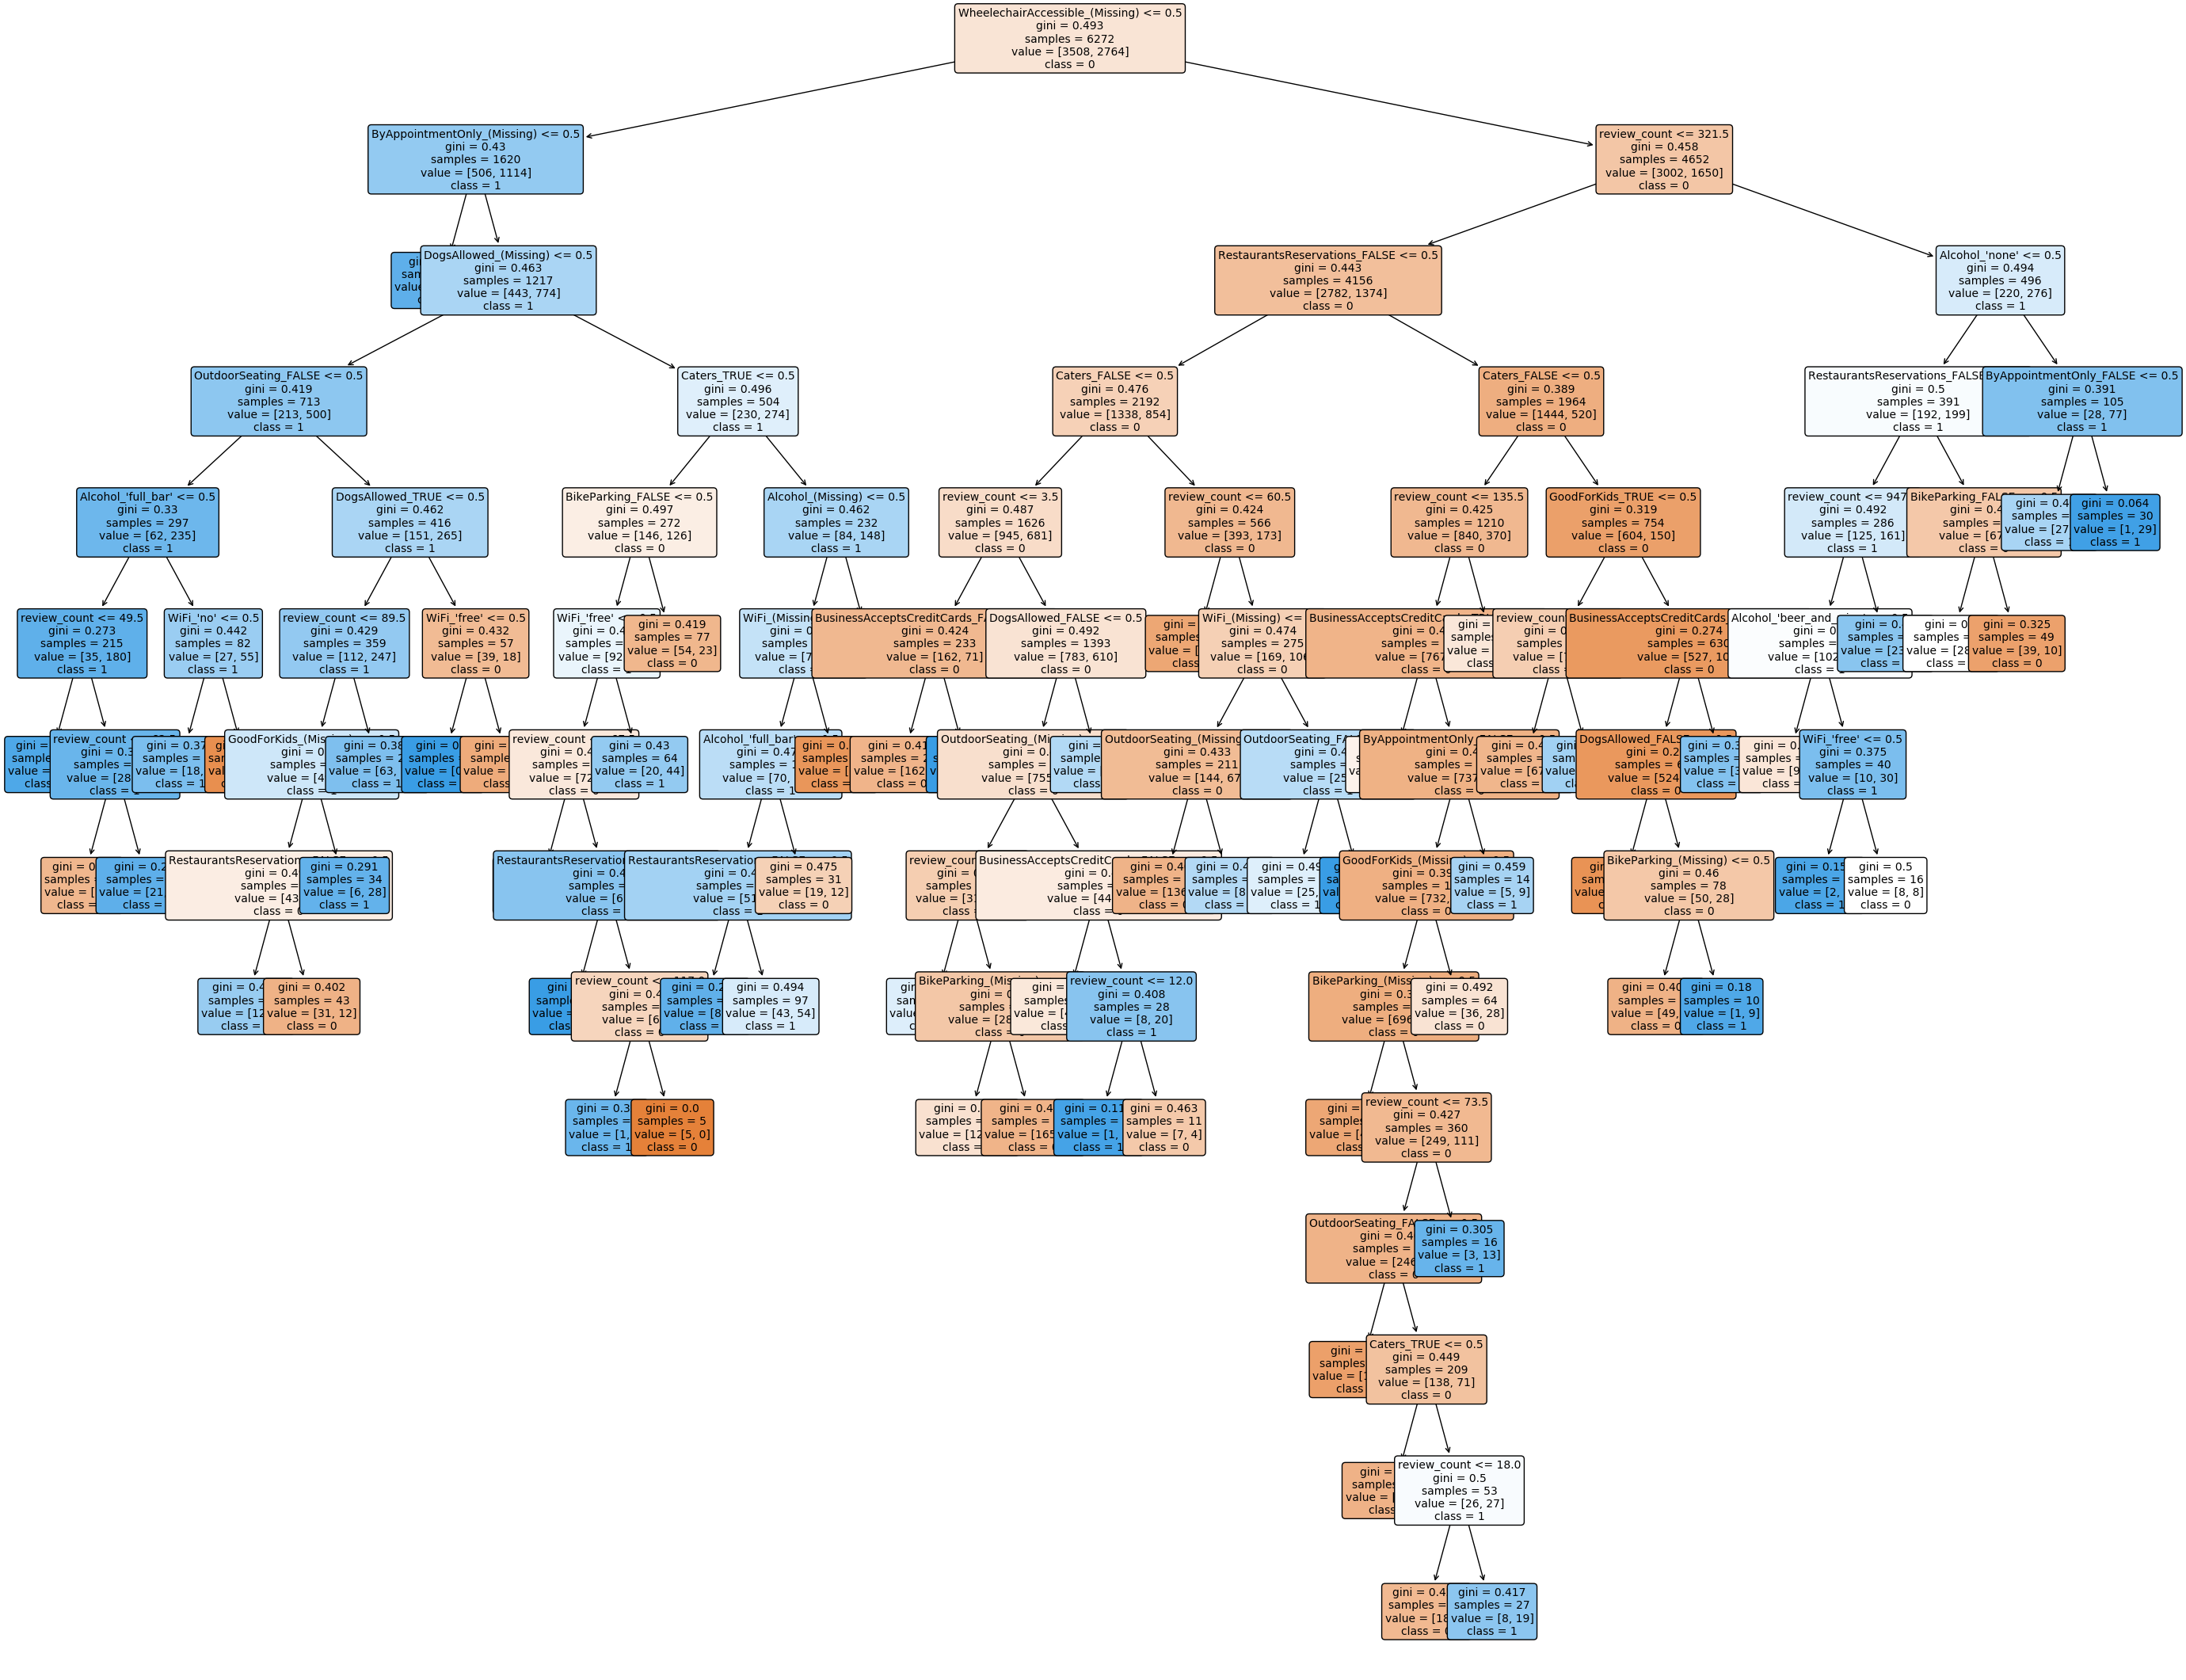

In [68]:
# Below is the code for casting the response variable as Integer and casting the independent variables into binary variables. 

#yelp_train2['stars'] = yelp_train2['stars'].astype('int64')
yelp_train_enc2 = pd.get_dummies(yelp_train, columns = ['Caters' , 'DogsAllowed' , 'RestaurantsReservations', 'OutdoorSeating', 'WheelechairAccessible' ,'ByAppointmentOnly' ,'BikeParking' , 'WiFi' , 'BusinessAcceptsCreditCards' , 'Alcohol' ,'GoodForKids'  ])


#below is the code for building the decision tree classifier

y_train2 = yelp_train_enc2['calledfourOrAbove']
X_train_enc2 = yelp_train_enc2.drop(['stars' ,'calledfourOrAbove' ], axis=1)

dtc2 = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.0005,
                             criterion = 'gini',
                             random_state = 88)

dtc2 = dtc2.fit(X_train_enc2, y_train2)

#below is the code for plotting the decision tree classifier and counting the number of nodes. 


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtc2.tree_.node_count)
plt.figure(figsize=(25,20))
plot_tree(dtc2, 
          feature_names=X_train_enc2.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=10
         ) 
plt.show()

In [69]:
#exhaustive cross-validation. 
#Exhaustive search over specified parameter values for an estimator.

from sklearn.model_selection import GridSearchCV

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{ 0:1 , 1: 1}],
               'random_state': [88]} 
            
dtc2 = DecisionTreeClassifier()
dtc_cv_acc2 = GridSearchCV(dtc2, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
# default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc2.fit(X_train_enc2, y_train2)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'class_weight': [{0: 1, 1: 1}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='accu

In [70]:
# below is the code that calcultates the validation accuracy in terms of ccp alpha. 


from sklearn.model_selection import GridSearchCV

acc2 = dtc_cv_acc2.cv_results_['mean_test_score'] 
# what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp2 = dtc_cv_acc2.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp2, 'Validation Accuracy': acc2}).head(20)


,ccp alpha,Validation Accuracy
0,0,0.648601
1,0.0005,0.678092
2,0.001,0.663424
3,0.0015,0.660234
4,0.002,0.656566
5,0.0025,0.653379
6,0.003,0.653379
7,0.0035,0.653379
8,0.004,0.653379
9,0.0045,0.653379


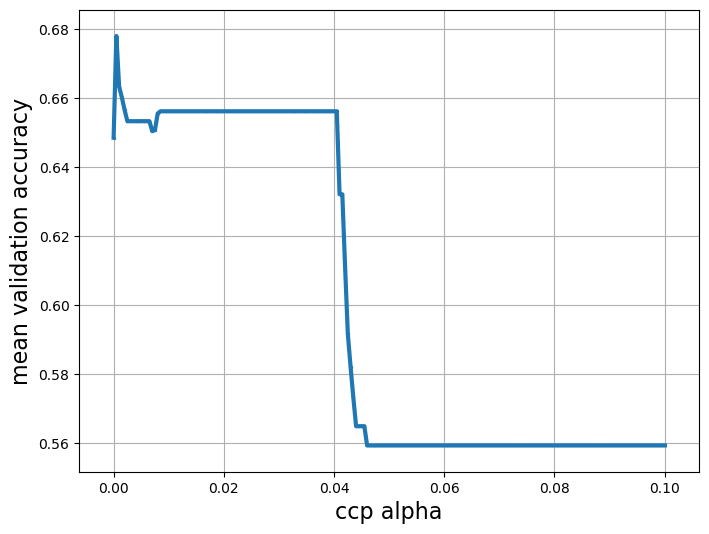

Grid best parameter ccp_alpha (max. accuracy):  0.0005
Grid best score (accuracy):  0.6780920163756234


In [71]:
# below is the code that plot the validation accuracy in terms of ccp alpha. 


plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp2, acc2, s=2)
plt.plot(ccp2, acc2, linewidth=3)
plt.grid(True, which='both')
plt.show()

print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc2.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc2.best_score_)

I built a regression tree model using CART algorithm with a complexity parameter first chosen to be equal to 0.001. Then, I did an exhausitive cross validation to validate the model and to chose the most adapted value of the complexity parameter. I selected the compelexity parameter value by plotting the mean validation accuracy in terms of the ccp alpha. To have the most adapted model (not overfitted and not underfitted) I chose the complexity parameter value which minimize the mean validation accuracy, that is cpp = 0.0005. I finally changed the ccp value to be equal to 0.0005 in the classification tree model. 

#### question (v)

In [72]:
from sklearn.metrics import confusion_matrix


# Below is the code for calcultating the accuracy, the TPR and the FPR.
def accuracy(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
    return accuracy

def TPR(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TPR = cm[1][1]/(cm[1][1]+cm[1][0])
    return TPR

def FPR(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    FPR = cm[0][1]/(cm[0][1]+cm[0][0])
    return FPR


#below is the code for computing the test fourOrAbove value. 
n = len(y_test)
yelp_test_enc2 = pd.get_dummies(yelp_test, columns = ['Caters' , 'DogsAllowed' , 'RestaurantsReservations', 'OutdoorSeating', 'WheelechairAccessible' ,'ByAppointmentOnly' ,'BikeParking' , 'WiFi' , 'BusinessAcceptsCreditCards' , 'Alcohol' ,'GoodForKids'  ])
y_test2 = yelp_test_enc2['calledfourOrAbove']
X_test_enc2 = yelp_test_enc2.drop(['stars' ,'calledfourOrAbove' ], axis=1)



#below is the code for computing the prediction y_pred_model for each model. 
#baseline model :
y_pred_baseline = pd.Series([0 for x in y_test2], index=y_test2.index)
# linear regression model with thresholding. 
y_pred_reg = pred_calledfourOrAbove(regression_model, X_test_reg)
# logistic regression model with thresholding at p=0.5.
value_pred_log = logistic_model.predict(X_test_reg)
m = len(value_pred_log)
y_pred_log = [0]*m
for i in range(m) :
    if value_pred_log[i] >= 0.5:
            y_pred_log[i] = 1  
# regression decision tree.
y_pred_dtc = pred_calledfourOrAbove(dtc_cv_acc, X_test)
# classification decision tree.
y_pred_dtc2 = dtc_cv_acc2.predict(X_test)




# we plot the table. 

comparison_data = {'Baseline model': ['{:.3f}'.format(accuracy(y_test2, y_pred_baseline)),
                                         '{:.4f}'.format(TPR(y_test2, y_pred_baseline)),
                                         '{:.3f}'.format(FPR(y_test2, y_pred_baseline))],
                    'Linear Regression': ['{:.3f}'.format(accuracy(y_test2, y_pred_reg)),
                                         '{:.4f}'.format(TPR(y_test2, y_pred_reg)),
                                         '{:.3f}'.format(FPR(y_test2, y_pred_reg))],
                   'Logistic Regression ': ['{:.3f}'.format(accuracy(y_test2, y_pred_log)),
                                               '{:.4f}'.format(TPR(y_test2, y_pred_log)),
                                               '{:.3f}'.format(FPR(y_test2, y_pred_log))],
                   'Regression tree model': ['{:.3f}'.format(accuracy(y_test2, y_pred_dtc)),
                                     '{:.4f}'.format(TPR(y_test2, y_pred_dtc)),
                                     '{:.3f}'.format(FPR(y_test2, y_pred_dtc))], 
                   'Classification tree model': ['{:.3f}'.format(accuracy(y_test2, y_pred_dtc2)),
                                              '{:.4f}'.format(TPR(y_test2, y_pred_dtc2)),
                                              '{:.3f}'.format(FPR(y_test2, y_pred_dtc2))]}

comparison_table = pd.DataFrame(data=comparison_data, index=['accuracy', 'TPR', 'FPR'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Baseline model,Linear Regression,Logistic Regression,Regression tree model,Classification tree model
accuracy,0.557,0.612,0.667,0.660,0.665
TPR,0.0000,0.1756,0.4723,0.4824,0.4319
FPR,0.000,0.041,0.178,0.200,0.150


Remember that the most important parameter here is the accuraty. By looking at the table, we can see that the linear regression model, the regression tree model, the logistic regression model and the classification tree model have a better accuraty than the baseline model. 
The linear regression has an accuracy equal to 61% which higher but not a lot higher than the accuracy of the baseline model. 
The accuracy of the other models are arround 66% which means that 66% of the time, models will give right answer to the question : "is the rate over 4 ?". It is not perfect, but it is a quite good performence. 
When we look at the TPR of the these models, they are pretty high (arround 50%) but the FPR are pretty low (between 15% and 20%, which means that models tend to underestimate the rates of restaurents. 

These results seems reasonable : the linear regression model is the simplest model and have a lower accuracy. The other models are good but not very good according to their accuracy, TPR and FPR. Their accuracy is better than the accuracy of the baseline model, and the TPR and FPR are reasonable. 

Finally, for this problem I would recommend the classification tree model. It is a tree decision model, so I is easy to interpret and to understand for owners of restaurents, which is highly important for them to improve their number of stars in yelp. It is also the better of the two types of tree model in term of accuracy and FPR and it has almost the same accuraty then the other regression models. 

### question e)

We studied the impact of diffrent features on the grades given to Las Vegas restaurents on Yelp. To see how the different features impact the star rate of the Las Vegas restaurents, I will plot a table and a diagramm from the classification tree analysis in which we can see the importance of the different features on having a high star rate. I will also look at the coefficients of the independant variables for the logisitc and linear regressions.

To have high star rating, I would give the three following tips. 

In [74]:
## the code below plots a table and a diagramm that underline the importance of the different features we studied. 
pd.DataFrame({'Feature' : X_train_enc.columns, 
              'Importance score': 100*dtc_cv_acc2.best_estimator_.feature_importances_}).round(1)



,Feature,Importance score
0,review_count,16.2
1,Caters_(Missing),0.6
2,Caters_FALSE,3.1
3,Caters_TRUE,1.1
4,DogsAllowed_(Missing),2.1
5,DogsAllowed_FALSE,3.9
6,DogsAllowed_TRUE,0.0
7,RestaurantsReservations_(Missing),0.0
8,RestaurantsReservations_FALSE,7.8
9,RestaurantsReservations_TRUE,0.0


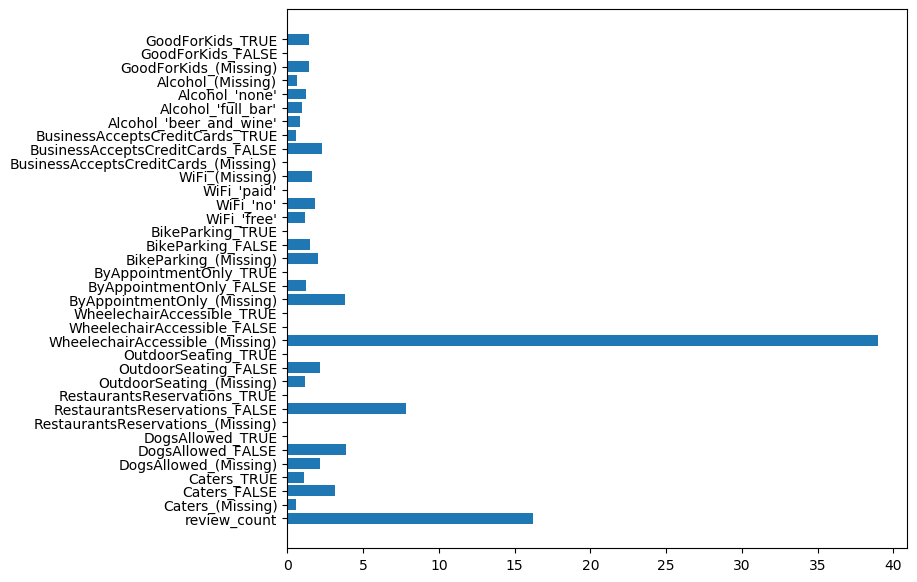

In [75]:
plt.figure(figsize=(8,7))
plt.barh(X_train_enc.columns, 100*dtc_cv_acc2.best_estimator_.feature_importances_)
plt.show()

#### FIRST TIP

First, we can remark that the miss of information of Wheelchair Accessibility seems an important feature in the diagramm but for this variable, 74.43% of the time, the information is missing, which means that the importance of this variable is biased. So, it is not relevent for our study, so we are not taking in consideration this feature. 
    However, the review_count variable has 0 of missing rate, and the diagram and the table above shows that the review_count is an important feature for having a high star rating. So, I would then advice Las Vegas restaurents to ask their customers to write reviews. For example, restaurents can send email to customers to remember them to write reviews, or they can ask them to do it when customers pay.


#### SECOND TIP
To increase high star rate, we can now look at the lowest coefficients in the linear and the logistic regression models. 
When we look at the coefficients, we can see that the feature "paid WIFI" has the most negative coefficient in both regressions models. Having paying wifi in comparaison of having free wifi descrease the odds of having 4 stars or above by : $\exp(-0.1798) = 0.83$. In other words, having paying wifi in comparaison of having free wifi descrease the odds of having 4 stars or above from 17%. It means that having WIFI for which customers have to pay decrease considerably the rating of the restaurent in Las Vegas. I would then advice restaurents to offer free WIFI for customers (or if it is economically not afforadable not to offer WIFI at all to customers). 


#### THRID TIP

Finally, to increase high star rate, we can now look at an other coefficients in the linear and the logistic regression models. 
When we look at the coefficient, we can see that the feature "accept credit cards" is important. Accepting credit cards seems to descrease the odds of having 4 stars or above by : $\exp(-0.252) = 0.77$. In other words, accepting credit cards  descrease the odds of having 4 stars or above from 23%. I would then advice restaurents not to accept credit cards, even if it seems surprising. 
